In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pylab as plt
pd.set_option('display.max_columns', None)

from IPython import display

In [2]:
## Run this in jupyter so any changes you make to the CommuterModel class will appear just by re-importing
## instead of having to re-start the kernel
%load_ext autoreload
%autoreload 2

In [3]:
from commuter_model import CommuterModel

In [7]:
[x for x in dir(CommuterModel) if "binary" in x] #confirming these functions built correctly

['auto_flag_binary',
 'bus_flag_binary',
 'commuterRail_flag_binary',
 'ebike_flag_binary',
 'escooter_flag_binary',
 'ferry_flag_binary',
 'motorcycle_flag_binary',
 'subway_flag_binary',
 'taxicab_flag_binary',
 'walking_flag_binary',
 'wfh_flag_binary']

In [6]:
# load ipums data to local variable (ipums_df_19)
ipums_df_19 = pd.read_csv("disaggregated_cleaned_ipums_data.csv",index_col=0)
ipums_df_19 = ipums_df_19[ipums_df_19['YEAR']==2019].reset_index(drop=True).copy()

# instantiate CommuterModel with ipums_df_19. It will now be commuter_model_1.ipums_df
commuter_model_1 = CommuterModel(ipums_df=ipums_df_19)

In [7]:
# commuter_model_1.ipums_df is now the dataframe tied to this specific instantiation of CommuterModel
# any changes to this will not affect the original ipums_df_19
commuter_model_1.ipums_df.head(5)

,YEAR,PERWT,HOME_STATEFIP,HOME_PUMA,PUMA_NAME,SEX,AGE,HRS_WK_DAILY,TOTAL_PERSONAL_INCOME,MODE_TRANSP_TO_WORK,MODE_TRANSP_TO_WORK_HBDMATCH,HOMEOWNER_LABEL,RACE_LABEL,EDUC_LABEL,DEPARTS_FOR_WORK_HOUR,ARRIVES_AT_WORK_HOUR,COMMUTE_DIRECTION_MANHATTAN,VEHICLE_AVAILABLE,OCC_DESCRIPTION,IND_CAT,IND_DESCRIPTION,PUMAKEY_HOME,PUMAKEY_WORK,DISTANCE_KM,COGNITIVE_DIFFICULTY,AMBULATORY_DIFFICULTY,IND_LIVING_DIFFICULTY,SELFCARE_DIFFICULTY,VISION_OR_HEARING_DIFFICULTY,VISION_DIFFICULTY,HEARING_DIFFICULTY
0,2019,23.0,9,500,Litchfield County,F,46,7.4,3800,"Auto, truck, or van",AutoOccupants,Rent,White,Grades12,8,9,in,1,Personal care aides,"Educational Services, and Health Care and Soci...",Home health care services,09_00500,36_03800,170.50491,0,0,0,0,0,0,0
1,2019,48.0,9,500,Litchfield County,M,51,11.0,488000,"Auto, truck, or van",AutoOccupants,Rent,White,College_5PlusYears,8,8,in,1,"Lawyers, and judges, magistrates, and other ju...","Professional, Scientific, and Management, and ...",Legal services,09_00500,36_03800,170.50491,0,0,0,0,0,0,0
2,2019,54.0,9,500,Litchfield County,F,44,11.0,438000,"Auto, truck, or van",AutoOccupants,Rent,White,College_5PlusYears,8,8,in,1,"Lawyers, and judges, magistrates, and other ju...","Professional, Scientific, and Management, and ...",Legal services,09_00500,36_03800,170.50491,0,0,0,0,0,0,0
3,2019,29.0,9,500,Litchfield County,M,28,10.0,20000,"Auto, truck, or van",AutoOccupants,Own,White,College_4Year,14,14,in,1,Computer hardware engineers,"Professional, Scientific, and Management, and ...",Computer systems design and related services,09_00500,36_03800,170.50491,0,0,0,0,0,0,0
4,2019,33.0,9,500,Litchfield County,M,66,12.0,727000,"Auto, truck, or van",AutoOccupants,Rent,White,College_5PlusYears,8,9,in,1,Chief executives and legislators,Retail Trade,Electronics Stores,09_00500,36_03800,170.50491,0,0,0,0,0,0,0


In [8]:
## Run all the class methods and set equal to new commuter_model_1.ipums_df columns - just like you'd do in 
## our previous notebook attempts

## Auto
commuter_model_1.ipums_df['FLAG_AUTO'] = commuter_model_1.auto_flag_binary(
                                        max_age=70
                                       ,min_distance = 2
                                       ,min_income = 32626
                                       ,male_pct = 100
                                       ,female_pct = 100
                                       ,age_dist = None
                                       )
## Motorcycle
commuter_model_1.ipums_df['FLAG_MOTORCYCLE'] = commuter_model_1.motorcycle_flag_binary(
                                        max_age=70
                                       ,max_distance = 300
                                       ,min_income = 32626
                                       ,male_pct = 100
                                       ,female_pct = 100
                                       ,age_dist = None
                                        )


## Taxicab
commuter_model_1.ipums_df['FLAG_TAXICAB'] = commuter_model_1.taxicab_flag_binary(
                                        max_distance = 30
                                       ,min_income = 32626
                                       ,male_pct = 100
                                       ,female_pct = 100
                                       ,age_dist = None
                                        )

## Bus
commuter_model_1.ipums_df['FLAG_EBUSES'] = commuter_model_1.bus_flag_binary(
                                        home_region=commuter_model_1.puma_home_Bus
                                        ,work_region=commuter_model_1.puma_work_Bus
                                        ,schedule=commuter_model_1.time_Bus
                                        ,affordability=20
                                        ,fixgaps=False
                                         )


## Subway
commuter_model_1.ipums_df['FLAG_SUBWAY'] = commuter_model_1.subway_flag_binary(
                                            home_region=commuter_model_1.puma_home_Subway
                                            ,work_region=commuter_model_1.puma_work_Subway
                                            ,schedule=commuter_model_1.time_Subway
                                            ,affordability=20
                                            ,fixgaps=False
                                            )



## Commuter Rail
commuter_model_1.ipums_df['FLAG_COMMUTERRAIL'] = commuter_model_1.commuterRail_flag_binary(
                                             home_region=commuter_model_1.puma_home_CommuterRail
                                            ,work_region=commuter_model_1.puma_work_CommuterRail
                                            ,schedule=commuter_model_1.time_CommuterRail
                                            ,affordability=20
                                            ,fixgaps=False
                                                        )

## Ferry
commuter_model_1.ipums_df['FLAG_FERRY'] = commuter_model_1.ferry_flag_binary(
                                            home_region=commuter_model_1.puma_home_Ferry
                                           ,work_region=commuter_model_1.puma_work_Ferry
                                           ,schedule=commuter_model_1.time_Ferry
                                           ,affordability=20
                                           ,fixgaps=False
                                          )



## E-Scooter
commuter_model_1.ipums_df['FLAG_ESCOOTER'] = commuter_model_1.escooter_flag_binary(
                                            max_age=60
                                            ,max_distance=2*1.6
                                            ,scooter_friendly_origins=commuter_model_1.bike_friendly_origins
                                            ,male_pct=100
                                            ,female_pct=100
                                            )


## Walking
commuter_model_1.ipums_df['FLAG_WALK'] = commuter_model_1.walking_flag_binary(
                                            max_age=100
                                            ,max_distance=2*1.6
                                            ,male_pct=100
                                            ,female_pct=100
                                            )

## E-Bike
commuter_model_1.ipums_df['FLAG_EBIKE']=commuter_model_1.ebike_flag_binary(
                                        max_age=70
                                        ,max_distance = 24
                                        ,male_pct = 100
                                        ,female_pct = 100
                                        ,age_dist = None
                                        ,bike_friendly_origins=commuter_model_1.bike_friendly_origins
                                        )


## Work From Home
commuter_model_1.ipums_df["FLAG_WFH"] = commuter_model_1.wfh_flag_binary(
                                            wfh_dampener=1
                                                )

In [15]:
## View all the new "FLAG_" columns
commuter_model_1.ipums_df.head(5)

,YEAR,PERWT,HOME_STATEFIP,HOME_PUMA,PUMA_NAME,SEX,AGE,HRS_WK_DAILY,TOTAL_PERSONAL_INCOME,MODE_TRANSP_TO_WORK,MODE_TRANSP_TO_WORK_HBDMATCH,HOMEOWNER_LABEL,RACE_LABEL,EDUC_LABEL,DEPARTS_FOR_WORK_HOUR,ARRIVES_AT_WORK_HOUR,COMMUTE_DIRECTION_MANHATTAN,VEHICLE_AVAILABLE,OCC_DESCRIPTION,IND_CAT,IND_DESCRIPTION,PUMAKEY_HOME,PUMAKEY_WORK,DISTANCE_KM,COGNITIVE_DIFFICULTY,AMBULATORY_DIFFICULTY,IND_LIVING_DIFFICULTY,SELFCARE_DIFFICULTY,VISION_OR_HEARING_DIFFICULTY,VISION_DIFFICULTY,HEARING_DIFFICULTY,FLAG_AUTO,FLAG_MOTORCYCLE,FLAG_TAXICAB,FLAG_EBUSES,FLAG_SUBWAY,FLAG_COMMUTERRAIL,FLAG_FERRY,FLAG_ESCOOTER,FLAG_WALK,FLAG_EBIKE,FLAG_WFH
0,2019,23.0,9,500,Litchfield County,F,46,7.4,3800,"Auto, truck, or van",AutoOccupants,Rent,White,Grades12,8,9,in,1,Personal care aides,"Educational Services, and Health Care and Soci...",Home health care services,09_00500,36_03800,170.50491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2019,48.0,9,500,Litchfield County,M,51,11.0,488000,"Auto, truck, or van",AutoOccupants,Rent,White,College_5PlusYears,8,8,in,1,"Lawyers, and judges, magistrates, and other ju...","Professional, Scientific, and Management, and ...",Legal services,09_00500,36_03800,170.50491,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
2,2019,54.0,9,500,Litchfield County,F,44,11.0,438000,"Auto, truck, or van",AutoOccupants,Rent,White,College_5PlusYears,8,8,in,1,"Lawyers, and judges, magistrates, and other ju...","Professional, Scientific, and Management, and ...",Legal services,09_00500,36_03800,170.50491,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
3,2019,29.0,9,500,Litchfield County,M,28,10.0,20000,"Auto, truck, or van",AutoOccupants,Own,White,College_4Year,14,14,in,1,Computer hardware engineers,"Professional, Scientific, and Management, and ...",Computer systems design and related services,09_00500,36_03800,170.50491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2019,33.0,9,500,Litchfield County,M,66,12.0,727000,"Auto, truck, or van",AutoOccupants,Rent,White,College_5PlusYears,8,9,in,1,Chief executives and legislators,Retail Trade,Electronics Stores,09_00500,36_03800,170.50491,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0


In [16]:
## loop through them to get counts

mode_flag_cols = [x for x in commuter_model_1.ipums_df.columns if "FLAG_" in x]
for c in mode_flag_cols:
    print(c)
    display.display(commuter_model_1.ipums_df.groupby(by=["YEAR",c]).agg({"PERWT":"sum"}))
    print("**"*50)

FLAG_AUTO


PERWT
YEAR FLAG_AUTO           
2019 0          1648131.0
     1          1153199.0

****************************************************************************************************
FLAG_MOTORCYCLE


PERWT
YEAR FLAG_MOTORCYCLE           
2019 0                 784413.0
     1                2016917.0

****************************************************************************************************
FLAG_TAXICAB


PERWT
YEAR FLAG_TAXICAB           
2019 0             1188637.0
     1             1612693.0

****************************************************************************************************
FLAG_EBUSES


PERWT
YEAR FLAG_EBUSES           
2019 0            1098504.0
     1            1702826.0

****************************************************************************************************
FLAG_SUBWAY


PERWT
YEAR FLAG_SUBWAY           
2019 0             743406.0
     1            2057924.0

****************************************************************************************************
FLAG_COMMUTERRAIL


PERWT
YEAR FLAG_COMMUTERRAIL           
2019 0                  2016230.0
     1                   785100.0

****************************************************************************************************
FLAG_FERRY


PERWT
YEAR FLAG_FERRY           
2019 0           2547081.0
     1            254249.0

****************************************************************************************************
FLAG_ESCOOTER


PERWT
YEAR FLAG_ESCOOTER           
2019 0              2640629.0
     1               160701.0

****************************************************************************************************
FLAG_WALK


PERWT
YEAR FLAG_WALK           
2019 0          2609808.0
     1           191522.0

****************************************************************************************************
FLAG_EBIKE


PERWT
YEAR FLAG_EBIKE           
2019 0            982351.0
     1           1818979.0

****************************************************************************************************
FLAG_WFH


PERWT
YEAR FLAG_WFH           
2019 0         2084400.0
     1          716930.0

****************************************************************************************************


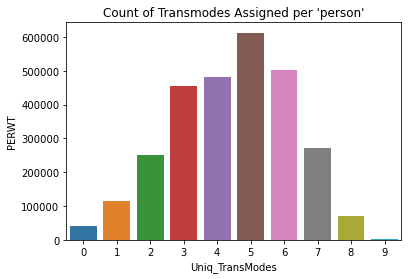

In [17]:
### Overlaps
commuter_model_1.overlaps = commuter_model_1.ipums_df.groupby(by=["YEAR"]+mode_flag_cols).agg({"PERWT":"sum"}).reset_index()
commuter_model_1.overlaps

commuter_model_1.overlaps['Uniq_TransModes']=commuter_model_1.overlaps[mode_flag_cols].sum(axis=1)
cts_by_transmodes = commuter_model_1.overlaps.groupby(by=["Uniq_TransModes"]).agg({"PERWT":"sum"}).reset_index()
sns.barplot(data=cts_by_transmodes,x="Uniq_TransModes",y="PERWT")
plt.title("Count of Transmodes Assigned per 'person'");

In [24]:
commuter_model_1.ipums_df['Weighted or No Option Assignment'] = commuter_model_1.WeightedAssignNoOption(
                                                                commuter_model_1.ipums_df['FLAG_AUTO'], 
                                                                commuter_model_1.ipums_df['FLAG_MOTORCYCLE'],
                                                                commuter_model_1.ipums_df['FLAG_TAXICAB'], 
                                                                commuter_model_1.ipums_df['FLAG_EBUSES'],
                                                                commuter_model_1.ipums_df['FLAG_SUBWAY'], 
                                                                commuter_model_1.ipums_df['FLAG_COMMUTERRAIL'],
                                                                commuter_model_1.ipums_df['FLAG_FERRY'], 
                                                                commuter_model_1.ipums_df['FLAG_ESCOOTER'],
                                                                commuter_model_1.ipums_df['FLAG_WALK'], 
                                                                commuter_model_1.ipums_df['FLAG_EBIKE'],
                                                                commuter_model_1.ipums_df['FLAG_WFH'],
                                                                (10,2,5,15,30,3,5,5,7,10,8))
commuter_model_1.ipums_df.head(5)

,YEAR,PERWT,HOME_STATEFIP,HOME_PUMA,PUMA_NAME,SEX,AGE,HRS_WK_DAILY,TOTAL_PERSONAL_INCOME,MODE_TRANSP_TO_WORK,MODE_TRANSP_TO_WORK_HBDMATCH,HOMEOWNER_LABEL,RACE_LABEL,EDUC_LABEL,DEPARTS_FOR_WORK_HOUR,ARRIVES_AT_WORK_HOUR,COMMUTE_DIRECTION_MANHATTAN,VEHICLE_AVAILABLE,OCC_DESCRIPTION,IND_CAT,IND_DESCRIPTION,PUMAKEY_HOME,PUMAKEY_WORK,DISTANCE_KM,COGNITIVE_DIFFICULTY,AMBULATORY_DIFFICULTY,IND_LIVING_DIFFICULTY,SELFCARE_DIFFICULTY,VISION_OR_HEARING_DIFFICULTY,VISION_DIFFICULTY,HEARING_DIFFICULTY,FLAG_AUTO,FLAG_MOTORCYCLE,FLAG_TAXICAB,FLAG_EBUSES,FLAG_SUBWAY,FLAG_COMMUTERRAIL,FLAG_FERRY,FLAG_ESCOOTER,FLAG_WALK,FLAG_EBIKE,FLAG_WFH,Weighted or No Option Assignment
0,2019,23.0,9,500,Litchfield County,F,46,7.4,3800,"Auto, truck, or van",AutoOccupants,Rent,White,Grades12,8,9,in,1,Personal care aides,"Educational Services, and Health Care and Soci...",Home health care services,09_00500,36_03800,170.50491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No Option
1,2019,48.0,9,500,Litchfield County,M,51,11.0,488000,"Auto, truck, or van",AutoOccupants,Rent,White,College_5PlusYears,8,8,in,1,"Lawyers, and judges, magistrates, and other ju...","Professional, Scientific, and Management, and ...",Legal services,09_00500,36_03800,170.50491,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,AutoOccupants
2,2019,54.0,9,500,Litchfield County,F,44,11.0,438000,"Auto, truck, or van",AutoOccupants,Rent,White,College_5PlusYears,8,8,in,1,"Lawyers, and judges, magistrates, and other ju...","Professional, Scientific, and Management, and ...",Legal services,09_00500,36_03800,170.50491,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,AutoOccupants
3,2019,29.0,9,500,Litchfield County,M,28,10.0,20000,"Auto, truck, or van",AutoOccupants,Own,White,College_4Year,14,14,in,1,Computer hardware engineers,"Professional, Scientific, and Management, and ...",Computer systems design and related services,09_00500,36_03800,170.50491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No Option
4,2019,33.0,9,500,Litchfield County,M,66,12.0,727000,"Auto, truck, or van",AutoOccupants,Rent,White,College_5PlusYears,8,9,in,1,Chief executives and legislators,Retail Trade,Electronics Stores,09_00500,36_03800,170.50491,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,AutoOccupants


In [18]:
commuter_model_1.ipums_df['Random or No Option Assignment'] = commuter_model_1.RandAssignNoOption(
                                                                commuter_model_1.ipums_df['FLAG_AUTO'], 
                                                                commuter_model_1.ipums_df['FLAG_MOTORCYCLE'],
                                                                commuter_model_1.ipums_df['FLAG_TAXICAB'], 
                                                                commuter_model_1.ipums_df['FLAG_EBUSES'],
                                                                commuter_model_1.ipums_df['FLAG_SUBWAY'], 
                                                                commuter_model_1.ipums_df['FLAG_COMMUTERRAIL'],
                                                                commuter_model_1.ipums_df['FLAG_FERRY'], 
                                                                commuter_model_1.ipums_df['FLAG_ESCOOTER'],
                                                                commuter_model_1.ipums_df['FLAG_WALK'], 
                                                                commuter_model_1.ipums_df['FLAG_EBIKE'],
                                                                commuter_model_1.ipums_df['FLAG_WFH'])
commuter_model_1.ipums_df.head(5)

,YEAR,PERWT,HOME_STATEFIP,HOME_PUMA,PUMA_NAME,SEX,AGE,HRS_WK_DAILY,TOTAL_PERSONAL_INCOME,MODE_TRANSP_TO_WORK,MODE_TRANSP_TO_WORK_HBDMATCH,HOMEOWNER_LABEL,RACE_LABEL,EDUC_LABEL,DEPARTS_FOR_WORK_HOUR,ARRIVES_AT_WORK_HOUR,COMMUTE_DIRECTION_MANHATTAN,VEHICLE_AVAILABLE,OCC_DESCRIPTION,IND_CAT,IND_DESCRIPTION,PUMAKEY_HOME,PUMAKEY_WORK,DISTANCE_KM,COGNITIVE_DIFFICULTY,AMBULATORY_DIFFICULTY,IND_LIVING_DIFFICULTY,SELFCARE_DIFFICULTY,VISION_OR_HEARING_DIFFICULTY,VISION_DIFFICULTY,HEARING_DIFFICULTY,FLAG_AUTO,FLAG_MOTORCYCLE,FLAG_TAXICAB,FLAG_EBUSES,FLAG_SUBWAY,FLAG_COMMUTERRAIL,FLAG_FERRY,FLAG_ESCOOTER,FLAG_WALK,FLAG_EBIKE,FLAG_WFH,Random or No Option Assignment
0,2019,23.0,9,500,Litchfield County,F,46,7.4,3800,"Auto, truck, or van",AutoOccupants,Rent,White,Grades12,8,9,in,1,Personal care aides,"Educational Services, and Health Care and Soci...",Home health care services,09_00500,36_03800,170.50491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No option
1,2019,48.0,9,500,Litchfield County,M,51,11.0,488000,"Auto, truck, or van",AutoOccupants,Rent,White,College_5PlusYears,8,8,in,1,"Lawyers, and judges, magistrates, and other ju...","Professional, Scientific, and Management, and ...",Legal services,09_00500,36_03800,170.50491,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,Motorcycle
2,2019,54.0,9,500,Litchfield County,F,44,11.0,438000,"Auto, truck, or van",AutoOccupants,Rent,White,College_5PlusYears,8,8,in,1,"Lawyers, and judges, magistrates, and other ju...","Professional, Scientific, and Management, and ...",Legal services,09_00500,36_03800,170.50491,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,Motorcycle
3,2019,29.0,9,500,Litchfield County,M,28,10.0,20000,"Auto, truck, or van",AutoOccupants,Own,White,College_4Year,14,14,in,1,Computer hardware engineers,"Professional, Scientific, and Management, and ...",Computer systems design and related services,09_00500,36_03800,170.50491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No option
4,2019,33.0,9,500,Litchfield County,M,66,12.0,727000,"Auto, truck, or van",AutoOccupants,Rent,White,College_5PlusYears,8,9,in,1,Chief executives and legislators,Retail Trade,Electronics Stores,09_00500,36_03800,170.50491,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,Motorcycle


In [19]:
commuter_model_1.ipums_df['Random or Chosen Assignment'] = commuter_model_1.RandAssignChosenOption(
                                                                commuter_model_1.ipums_df['Random or No Option Assignment'], 
                                                                commuter_model_1.ipums_df['MODE_TRANSP_TO_WORK_HBDMATCH'],
                                                                "Current")
commuter_model_1.ipums_df.head(5)

,YEAR,PERWT,HOME_STATEFIP,HOME_PUMA,PUMA_NAME,SEX,AGE,HRS_WK_DAILY,TOTAL_PERSONAL_INCOME,MODE_TRANSP_TO_WORK,MODE_TRANSP_TO_WORK_HBDMATCH,HOMEOWNER_LABEL,RACE_LABEL,EDUC_LABEL,DEPARTS_FOR_WORK_HOUR,ARRIVES_AT_WORK_HOUR,COMMUTE_DIRECTION_MANHATTAN,VEHICLE_AVAILABLE,OCC_DESCRIPTION,IND_CAT,IND_DESCRIPTION,PUMAKEY_HOME,PUMAKEY_WORK,DISTANCE_KM,COGNITIVE_DIFFICULTY,AMBULATORY_DIFFICULTY,IND_LIVING_DIFFICULTY,SELFCARE_DIFFICULTY,VISION_OR_HEARING_DIFFICULTY,VISION_DIFFICULTY,HEARING_DIFFICULTY,FLAG_AUTO,FLAG_MOTORCYCLE,FLAG_TAXICAB,FLAG_EBUSES,FLAG_SUBWAY,FLAG_COMMUTERRAIL,FLAG_FERRY,FLAG_ESCOOTER,FLAG_WALK,FLAG_EBIKE,FLAG_WFH,Random or No Option Assignment,Random or Chosen Assignment
0,2019,23.0,9,500,Litchfield County,F,46,7.4,3800,"Auto, truck, or van",AutoOccupants,Rent,White,Grades12,8,9,in,1,Personal care aides,"Educational Services, and Health Care and Soci...",Home health care services,09_00500,36_03800,170.50491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No option,AutoOccupants
1,2019,48.0,9,500,Litchfield County,M,51,11.0,488000,"Auto, truck, or van",AutoOccupants,Rent,White,College_5PlusYears,8,8,in,1,"Lawyers, and judges, magistrates, and other ju...","Professional, Scientific, and Management, and ...",Legal services,09_00500,36_03800,170.50491,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,Motorcycle,Motorcycle
2,2019,54.0,9,500,Litchfield County,F,44,11.0,438000,"Auto, truck, or van",AutoOccupants,Rent,White,College_5PlusYears,8,8,in,1,"Lawyers, and judges, magistrates, and other ju...","Professional, Scientific, and Management, and ...",Legal services,09_00500,36_03800,170.50491,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,Motorcycle,Motorcycle
3,2019,29.0,9,500,Litchfield County,M,28,10.0,20000,"Auto, truck, or van",AutoOccupants,Own,White,College_4Year,14,14,in,1,Computer hardware engineers,"Professional, Scientific, and Management, and ...",Computer systems design and related services,09_00500,36_03800,170.50491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No option,AutoOccupants
4,2019,33.0,9,500,Litchfield County,M,66,12.0,727000,"Auto, truck, or van",AutoOccupants,Rent,White,College_5PlusYears,8,9,in,1,Chief executives and legislators,Retail Trade,Electronics Stores,09_00500,36_03800,170.50491,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,Motorcycle,Motorcycle


In [89]:
commuter_model_1.ipums_df.groupby(by=["Random or Chosen Assignment"]).agg({"PERWT":"sum"})

,PERWT
Random or Chosen Assignment,
AutoOccupants,270856.0
Bicycle,436236.0
Bus,372617.0
CommuterRail,215737.0
Escooter,25018.0
Ferry,51805.0
Motorcycle,446166.0
Other,1134.0
Subway,496384.0


In [22]:
commuter_model_1.ipums_df['Gas_CO2_lbs'] = commuter_model_1.GasCO2(
                                                commuter_model_1.ipums_df['MODE_TRANSP_TO_WORK_HBDMATCH'], 
                                                commuter_model_1.ipums_df['DISTANCE_KM'])
commuter_model_1.ipums_df.head(5)

,YEAR,PERWT,HOME_STATEFIP,HOME_PUMA,PUMA_NAME,SEX,AGE,HRS_WK_DAILY,TOTAL_PERSONAL_INCOME,MODE_TRANSP_TO_WORK,MODE_TRANSP_TO_WORK_HBDMATCH,HOMEOWNER_LABEL,RACE_LABEL,EDUC_LABEL,DEPARTS_FOR_WORK_HOUR,ARRIVES_AT_WORK_HOUR,COMMUTE_DIRECTION_MANHATTAN,VEHICLE_AVAILABLE,OCC_DESCRIPTION,IND_CAT,IND_DESCRIPTION,PUMAKEY_HOME,PUMAKEY_WORK,DISTANCE_KM,COGNITIVE_DIFFICULTY,AMBULATORY_DIFFICULTY,IND_LIVING_DIFFICULTY,SELFCARE_DIFFICULTY,VISION_OR_HEARING_DIFFICULTY,VISION_DIFFICULTY,HEARING_DIFFICULTY,FLAG_AUTO,FLAG_MOTORCYCLE,FLAG_TAXICAB,FLAG_EBUSES,FLAG_SUBWAY,FLAG_COMMUTERRAIL,FLAG_FERRY,FLAG_ESCOOTER,FLAG_WALK,FLAG_EBIKE,FLAG_WFH,Random or No Option Assignment,Random or Chosen Assignment,Gas_CO2_lbs
0,2019,23.0,9,500,Litchfield County,F,46,7.4,3800,"Auto, truck, or van",AutoOccupants,Rent,White,Grades12,8,9,in,1,Personal care aides,"Educational Services, and Health Care and Soci...",Home health care services,09_00500,36_03800,170.50491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No option,AutoOccupants,74.101434
1,2019,48.0,9,500,Litchfield County,M,51,11.0,488000,"Auto, truck, or van",AutoOccupants,Rent,White,College_5PlusYears,8,8,in,1,"Lawyers, and judges, magistrates, and other ju...","Professional, Scientific, and Management, and ...",Legal services,09_00500,36_03800,170.50491,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,Motorcycle,Motorcycle,74.101434
2,2019,54.0,9,500,Litchfield County,F,44,11.0,438000,"Auto, truck, or van",AutoOccupants,Rent,White,College_5PlusYears,8,8,in,1,"Lawyers, and judges, magistrates, and other ju...","Professional, Scientific, and Management, and ...",Legal services,09_00500,36_03800,170.50491,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,Motorcycle,Motorcycle,74.101434
3,2019,29.0,9,500,Litchfield County,M,28,10.0,20000,"Auto, truck, or van",AutoOccupants,Own,White,College_4Year,14,14,in,1,Computer hardware engineers,"Professional, Scientific, and Management, and ...",Computer systems design and related services,09_00500,36_03800,170.50491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No option,AutoOccupants,74.101434
4,2019,33.0,9,500,Litchfield County,M,66,12.0,727000,"Auto, truck, or van",AutoOccupants,Rent,White,College_5PlusYears,8,9,in,1,Chief executives and legislators,Retail Trade,Electronics Stores,09_00500,36_03800,170.50491,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,Motorcycle,Motorcycle,74.101434
